# Problem 1: Mathematical Pendulum

In [37]:
import numpy as np
from math import pi, sin, cos

h = 0.05 # step size
tend = 50
nt = int(tend/h) # Number of points
tvalues = np.linspace(0, tend, nt)
# build t as Euler's method iterates
p = np.zeros(nt) # p0 = 0
q = np.zeros(nt)
H = np.zeros(nt)
q[0] = pi/3
H[0] = 0.5*pow(p[0],2) - cos(q[0])

## (i): Forward Euler's method

In [38]:
# (i) Forward Euler's method
for t in range(nt-1):
	qt = q[t]
	pt = p[t]

	q[t+1] = qt + h*pt
	p[t+1] = pt + h*(-sin(qt))
	H[t+1] = 0.5*pow(p[t+1],2) - cos(q[t+1])


pN = -0.054867441689298135
qN = 2.9703622219987755


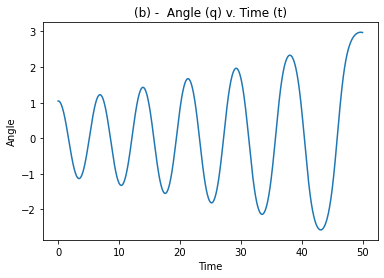

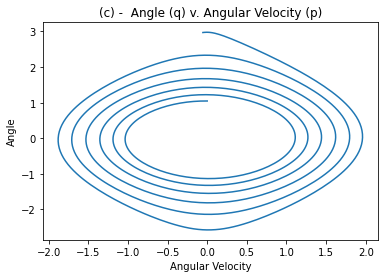

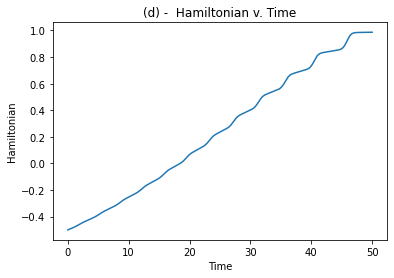

In [39]:
# Output
import matplotlib.pyplot as plt
# (a)
print(f"pN = {p[-1]}\nqN = {q[-1]}")
# (b)
plt.figure(1)
plt.plot(tvalues, q)
plt.title("(b) -  Angle (q) v. Time (t)")
plt.xlabel("Time")
plt.ylabel("Angle")
plt.show()
# (c)
plt.figure(2)
plt.plot(p, q)
plt.title("(c) -  Angle (q) v. Angular Velocity (p)")
plt.xlabel("Angular Velocity")
plt.ylabel("Angle")
plt.show()
# (d)
plt.figure(3)
plt.plot(tvalues, H)
plt.title("(d) -  Hamiltonian v. Time")
plt.xlabel("Time")
plt.ylabel("Hamiltonian")
plt.show()

## (ii) : Sympletic Euler's method

In [40]:
# (ii) Sympletic Euler's method
for t in range(nt-1):
	qt = q[t]
	pt = p[t]

	p[t+1] = pt + h*(-sin(qt))
	q[t+1] = qt + h*p[t+1]
	H[t+1] = 0.5*pow(p[t+1],2) - cos(q[t+1])

pN = -0.5185144287989518
qN = -0.8965541537450286


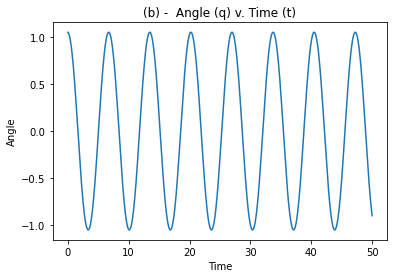

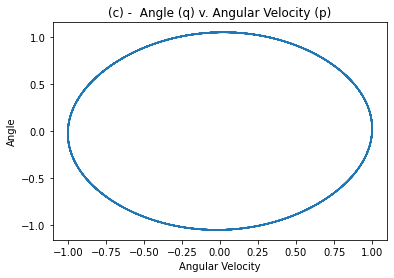

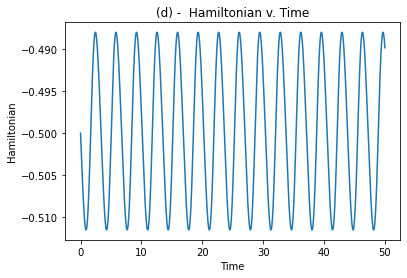

In [41]:
# Output

# (a)
print(f"pN = {p[-1]}\nqN = {q[-1]}")
# (b)
plt.figure(1)
plt.plot(tvalues, q)
plt.title("(b) -  Angle (q) v. Time (t)")
plt.xlabel("Time")
plt.ylabel("Angle")
plt.show()
# (c)
plt.figure(2)
plt.plot(p, q)
plt.title("(c) -  Angle (q) v. Angular Velocity (p)")
plt.xlabel("Angular Velocity")
plt.ylabel("Angle")
plt.show()
# (d)
plt.figure(3)
plt.plot(tvalues, H)
plt.title("(d) -  Hamiltonian v. Time")
plt.xlabel("Time")
plt.ylabel("Hamiltonian")
plt.show()

# Problem 2: SIR Model with Real Data

In [42]:
# Parameters
h = 0.2
tend = 20
nt = int(tend/h)
tvalues = np.linspace(0, tend, nt)
confined = np.array([1, 3, 7, 25, 72, 222, 282, 256, 233, 189, 123, 70, 25, 11, 4])
nboys = 763

BETA = 1.663
GAMMA = 0.441

s = np.zeros(nt)
i = np.zeros(nt)
r = np.zeros(nt)
s[0], i[0], r[0] = 762/763, 1/763, 0

In [43]:
# Compute t1 and t2 use RK2
def dsdt(s, i):
	return -BETA*s*i
def didt(s, i):
	return BETA*s*i-GAMMA*i
def drdt(i):
	return GAMMA*i

def rk2(t):
	sk1, ik1, rk1 = dsdt(s[t], i[t]), didt(s[t], i[t]), drdt(i[t])
	s_temp = s[t] +h*sk1
	i_temp = i[t] + h*ik1
	
	sk2 = dsdt(s_temp, i_temp)
	ik2 = didt(s_temp, i_temp)
	rk2 = drdt(i_temp)

	s[t+1] = s[t] + (h/2)*(sk1 + sk2)
	i[t+1] = i[t] + (h/2)*(ik1 + ik2)
	r[t+1] = r[t] + (h/2)*(rk1 + rk2)
	pass

rk2(0)
rk2(1)

In [44]:
# Compute the rest of t using Adam's predictor-corrector model
def ab2(wtm1, g1, g2):
	return wtm1 + (h/2)*(3*g1-g2)

def adamspc(t):
	sb = ab2(s[t-1], dsdt(s[t-1], i[t-1]), dsdt(s[t-2], i[t-2]))
	ib = ab2(i[t-1], didt(s[t-1], i[t-1]), didt(s[t-2], i[t-2]))

	s[t] = s[t-1] + (h/12)*(5*dsdt(sb,ib)+8*dsdt(s[t-1],i[t-1])-dsdt(s[t-2],i[t-2]))
	i[t] = i[t-1] + (h/12)*(5*didt(sb,ib)+8*didt(s[t-1],i[t-1])-didt(s[t-2],i[t-2]))
	r[t] = r[t-1] + (h/12)*(5*drdt(ib)+8*drdt(i[t-1])-drdt(i[t-2]))

for t in range(3, nt):
	adamspc(t)

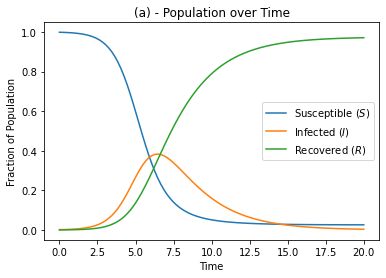

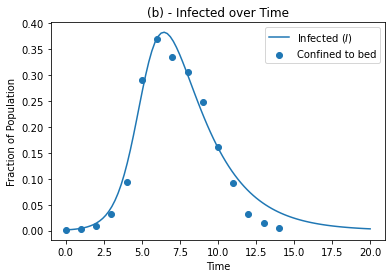

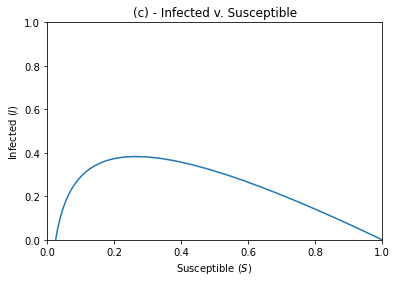

In [45]:
# Plot

# (a)
plt.figure(1)
plt.plot(tvalues, s, label = "Susceptible $(S)$")
plt.plot(tvalues, i, label = "Infected $(I)$")
plt.plot(tvalues, r, label = "Recovered $(R)$")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Fraction of Population")
plt.title("(a) - Population over Time")
plt.show()

# (b)
plt.figure(2)
plt.plot(tvalues, i, label = "Infected $(I)$")
plt.scatter(list(range(len(confined))), confined/nboys, label = "Confined to bed")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Fraction of Population")
plt.title("(b) - Infected over Time")
plt.show()

# (c)
plt.figure(3)
plt.plot(s, i)
plt.xlabel("Susceptible $(S)$")
plt.ylabel("Infected $(I)$")
plt.title("(c) - Infected v. Susceptible")
plt.axis([0, 1, 0, 1])
plt.show()

In [46]:
# Output values
import math
print(f"Total residents who did not contract the flu: {math.floor(s[-1]*nboys)}")
print(f"Peak number of infected: {math.floor(max(i)*nboys)}")
print(f"Time of greatest number of infected: {tvalues[np.where(i == max(i))[0][0]]}")

Total residents who did not contract the flu: 19
Peak number of infected: 292
Time of greatest number of infected: 6.4646464646464645


# Problem A: RK4 for Problem 1

In [47]:
h = 0.05 # step size
tend = 50
nt = int(tend/h) # Number of points
tvalues = np.linspace(0, tend, nt)
# build t as Euler's method iterates
p = np.zeros(nt) # p0 = 0
q = np.zeros(nt)
H = np.zeros(nt)
q[0] = pi/3
H[0] = 0.5*pow(p[0],2) - cos(q[0])

In [48]:
def dpdt(q):
	return -sin(q)
	
def dqdt(p):
	return p

In [56]:
# Use RK4 method
for t in range(1, nt):
	qt = q[t-1]
	pt = p[t-1]

	pk1 = dpdt(qt)
	qk1 = dqdt(pt)

	pk2 = dpdt(qt + (h/2)*pk1)
	qk2 = dqdt(pt + (h/2)*qk1)

	pk3 = dpdt(qt + (h/2)*pk2)
	qk3 = dqdt(pt + (h/2)*qk2)

	pk4 = dpdt(qt + h*pk3)
	qk4 = dqdt(pt + h*qk3)

	p[t] = pt + (h/6)*(pk1 + 2*pk2 + 2*pk3 + pk4)
	q[t] = qt + (h/6)*(qk1 + 2*qk2 + 2*qk3 + qk4)
	H[t] = 0.5*pow(p[t],2) - cos(q[t])


pN = -0.19570383358947646
qN = 2.884001182143138


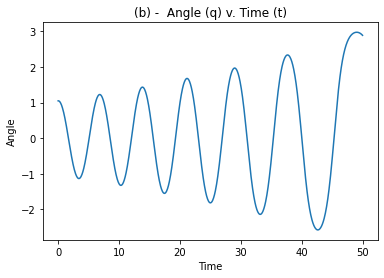

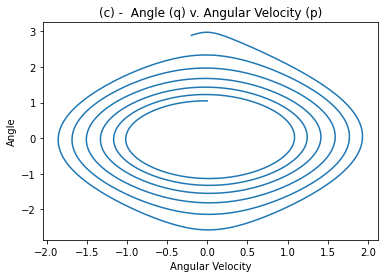

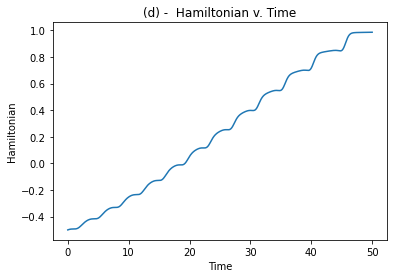

In [57]:
# Output

# (a)
print(f"pN = {p[-1]}\nqN = {q[-1]}")
# (b)
plt.figure(1)
plt.plot(tvalues, q)
plt.title("(b) -  Angle (q) v. Time (t)")
plt.xlabel("Time")
plt.ylabel("Angle")
plt.show()
# (c)
plt.figure(2)
plt.plot(p, q)
plt.title("(c) -  Angle (q) v. Angular Velocity (p)")
plt.xlabel("Angular Velocity")
plt.ylabel("Angle")
plt.show()
# (d)
plt.figure(3)
plt.plot(tvalues, H)
plt.title("(d) -  Hamiltonian v. Time")
plt.xlabel("Time")
plt.ylabel("Hamiltonian")
plt.show()